In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import sin_gan as sg

torch.manual_seed(111)
MODEL_PATH = 'sin-gan-snapshot.pickle'

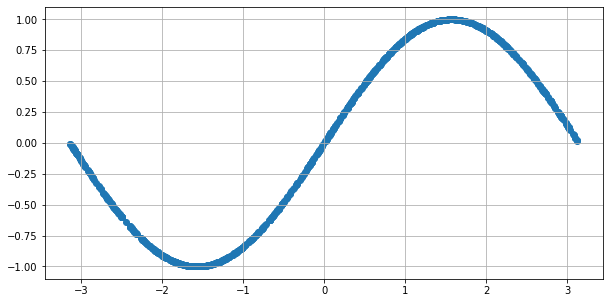

batch_size: 32
Epoch: 0 Loss D.: 0.376132 Loss G.: 1.574187
Epoch: 50 Loss D.: 0.700344 Loss G.: 0.657217
Epoch: 100 Loss D.: 0.684338 Loss G.: 0.694148
Epoch: 150 Loss D.: 0.688113 Loss G.: 0.688150
Epoch: 200 Loss D.: 0.692016 Loss G.: 0.688256
Epoch: 250 Loss D.: 0.688067 Loss G.: 0.702772
Model trained.


In [2]:
train_set = sg.prepare_train_data()
train_data = torch.stack([x[0] for x in train_set])

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sc = ax.scatter(train_data[:, 0], train_data[:, 1])
ax.grid();
plt.show()

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=32, shuffle=True
)

sg.train_model(
    generator=sg.Generator(),
    discriminator=sg.Discriminator(),
    train_loader=train_loader,
    model_path=MODEL_PATH)

print(f"Model trained.")

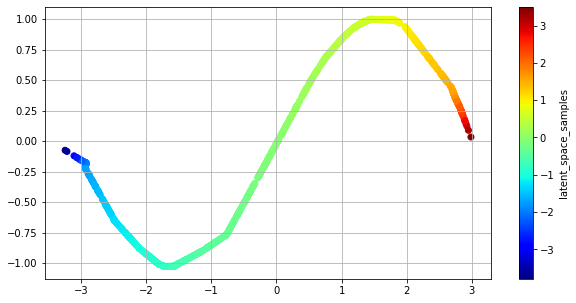

In [5]:
d = torch.load(MODEL_PATH)
discriminator, generator = d['D'], d['G']

latent_space_samples = torch.randn(1000, 1)
generated_samples = generator(latent_space_samples).detach()

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
cm = plt.cm.get_cmap('jet')
sc = ax.scatter(
    generated_samples[:, 0].numpy(),
    generated_samples[:, 1].numpy(),
    c=np.concatenate(latent_space_samples.numpy()),
    cmap=cm)
fig.colorbar(sc, ax=ax).set_label('latent_space_samples')
ax.grid() ; plt.show()

# The generator has learned to map the points from (approximately) [-3, 3] (99% of the normal distribution)
# into 2D plane, as a sinusoid.

# One can see that values closer to -3 map to the beginning of the sinusoid, 
# whereas values closer to 3 map to the latter part of the sinusoid. Hence the generator has learned
# to create the sinusoid.